In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# importing os module
import os
import numpy as np
from PIL import Image, ImageOps
from numpy import asarray
from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [2]:
# Dependencies to Visualise the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D, BatchNormalization
#tf.config.run_functions_eagerly(True)
#tf.data.experimental.enable_debug_mode()

In [3]:
#Function to convert images to array
def img_to_array(target_folder, img_size):
    x = []
    y = []
    path = "/content/drive/My Drive/archive/face/"
    main_folder = path + target_folder
    for count, foldername in enumerate(os.listdir(main_folder)):
        print(foldername)
        folder = main_folder + "/" + foldername
        for count, filename in enumerate(os.listdir(folder)):
            # load convert and resize the image
            img_path = os.path.join(folder, filename)
            img = image.load_img(img_path, 
                                 target_size=(img_size, img_size, 1), 
                                 color_mode="grayscale")
            
            # PIL images into NumPy arrays
            img_data = image.img_to_array(img)#asarray(img)
            x.append(img_data)
            y.append(target_folder)
    return x,y

In [4]:

target_folder1= "human_face"
target_folder2 = "others"
img_size = 48
# Call image to array function to convert all Human Face images to array
face_feature,face_target = img_to_array(target_folder1, img_size)
print(len(face_feature))
print(len(face_target))

anger
disgust
fear
happyness
neutrality
person
sadness
surprise
6343
6343


In [5]:
others_feature,others_target = img_to_array(target_folder2, img_size)
print(len(others_feature))
print(len(others_target))

car
cat
dog
emoji
flower
fruit
wild
7921
7921


In [6]:
#For Face Models only
features1 = others_feature + face_feature
target1 = others_target + face_target

features1_arr = np.array(features1)
target1_arr = np.array(target1)
print(features1_arr.shape)
print(target1_arr.shape)

(14264, 48, 48, 1)
(14264,)


In [7]:
# Tranfer the arrays to coresponding variables
X = features1_arr
y= target1_arr
print(X.shape)
print(y.shape)

(14264, 48, 48, 1)
(14264,)


In [8]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=73)
# Check the shape of traing data
print(X_train.shape)
# Check the shape of testing data
print(y_train.shape)

(10698, 48, 48, 1)
(10698,)


In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [10]:
# Encode the labels to numeric form
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)
classes = le.classes_
classes

array(['human_face', 'others'], dtype='<U10')

In [11]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 2 #len(classes)
y_train = to_categorical(y_train_encoded, num_classes)
y_test = to_categorical(y_test_encoded, num_classes)

y_train[0]

array([0., 1.], dtype=float32)

In [12]:
X_train[0][0]

array([[0.43529412],
       [0.4117647 ],
       [0.49019608],
       [0.32941177],
       [0.3137255 ],
       [0.33333334],
       [0.28627452],
       [0.24705882],
       [0.28627452],
       [0.27058825],
       [0.2627451 ],
       [0.41568628],
       [0.6117647 ],
       [0.6313726 ],
       [0.6745098 ],
       [0.69411767],
       [0.67058825],
       [0.67058825],
       [0.6       ],
       [0.6       ],
       [0.59607846],
       [0.58431375],
       [0.58431375],
       [0.5764706 ],
       [0.4117647 ],
       [0.21176471],
       [0.23529412],
       [0.06666667],
       [0.07450981],
       [0.08235294],
       [0.09411765],
       [0.04705882],
       [0.02745098],
       [0.03137255],
       [0.02352941],
       [0.01568628],
       [0.11372549],
       [0.03529412],
       [0.03529412],
       [0.03137255],
       [0.02745098],
       [0.03137255],
       [0.02745098],
       [0.02745098],
       [0.03137255],
       [0.02745098],
       [0.03137255],
       [0.019

In [13]:
# building a linear stack of layers with the sequential model
model = Sequential()
activ = 'relu'

# convolutional layer
model.add(Conv2D(32, kernel_size=3, padding='valid', 
                 activation=activ, 
                 input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, padding='valid', 
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(128, activation= activ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation= activ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# output layer
model.add(Dense(2, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', 
              metrics=['accuracy'], optimizer= 'sgd')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 64)       2

In [15]:
# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
168/168 [==============================] - 62s 333ms/step - loss: 0.4405 - accuracy: 0.8351 - val_loss: 0.8861 - val_accuracy: 0.4302
Epoch 2/5
168/168 [==============================] - 49s 290ms/step - loss: 0.2187 - accuracy: 0.9319 - val_loss: 0.6287 - val_accuracy: 0.6105
Epoch 3/5
168/168 [==============================] - 59s 348ms/step - loss: 0.1691 - accuracy: 0.9450 - val_loss: 0.1894 - val_accuracy: 0.9596
Epoch 4/5
168/168 [==============================] - 54s 321ms/step - loss: 0.1538 - accuracy: 0.9475 - val_loss: 0.3086 - val_accuracy: 0.8393
Epoch 5/5
168/168 [==============================] - 46s 274ms/step - loss: 0.1426 - accuracy: 0.9520 - val_loss: 0.0978 - val_accuracy: 0.9680


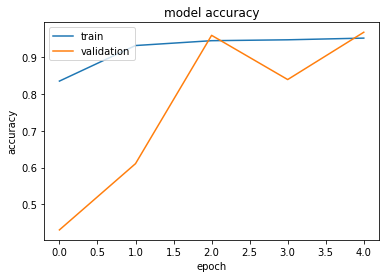

In [16]:
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


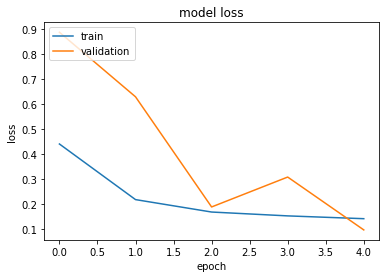

In [17]:
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Saving and Loading models

We can save our trained models using the HDF5 binary format with the extension `.h5`

In [18]:
# Save the model
model.save("trained_models/face_model.h5")

In [19]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("trained_models/face_model.h5")

In [20]:
model

## Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [21]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

112/112 - 7s - loss: 0.0978 - accuracy: 0.9680 - 7s/epoch - 58ms/step
Loss: 0.09782330691814423, Accuracy: 0.9680314064025879


## Making Predictions

We can use our trained model to make predictions using `model.predict`

In [22]:
# Define default image size for our model
image_path = os.path.join("test_image", "emoji1.jpeg").replace("\\", "/")

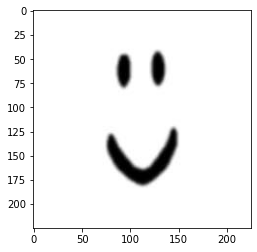

1/1 [==============================] - 1s 1s/step
others


In [23]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing import image
im = Image.open(image_path)
plt.imshow(im)
plt.show()
# Resize
img = im.resize((img_size, img_size))
# Grayscale
imgGray = img.convert('L')
# Convert the image to a numpy array 
image = image.img_to_array(imgGray)
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255
# building the input vector from the 28x28 pixels
f_data = image.reshape(1,img_size, img_size,1) #con1D
# f_data = image.reshape(1,size* size) #dense
# Make a prediction
face_result = model.predict(f_data).round()
face_index = np.argmax(face_result)
face = classes[face_index]
print(face)